# Eo-leorn:
- **eo-learn** is a collection of open source Python packages that have been developed to seamlessly access and process **spatio-temporal image sequences** acquired by any **satellite** fleet in a **timely and automatic manner**. 
- **eo-learn is easy to use**, it’s design modular, and encourages collaboration – sharing and reusing of specific tasks in a typical EO-value-extraction workflows, such as **cloud masking**, **image co-registration**, **feature extraction**, **classification**, etc

eo-learn makes extraction of valuable information from satellite imagery as easy as defining a sequence of operations to be performed on satellite imagery. Image below illustrates a processing chain that maps water in satellite imagery by thresholding the Normalised Difference Water Index in user specified region of interest.

![Alt text](../image/eo-learn-illustration.webp)

###  oe-learn modules:

- **core** - The main module which implements basic building blocks (EOPatch, EOTask and EOWorkflow) and commonly used functionalities.

- **coregistration** - Tasks which deal with image co-registration.

- **features** - A collection of utilities for extracting data properties and feature manipulation.

- **geometry** - Geometry-related tasks used for transformation and conversion between vector and raster data.

- **io** - Input/output tasks that deal with obtaining data from Sentinel Hub services or saving and loading data locally.

- **mask** - Tasks used for masking of data and calculation of cloud/snow/other masks.

- **ml-tools** - Various tools that can be used before or after the machine learning process.

- **visualization** - Visualization tools for the core elements of eo-learn.

### Important Links
- [eo-learn documentation](https://eo-learn.readthedocs.io/en/latest/)
- [Core Overview](https://eo-learn.readthedocs.io/en/latest/examples/core/CoreOverview.html)

### Set variables and project setup

In [1]:
# Load the autoreload extension to automatically reload modules when files on disk are updated
%load_ext autoreload
# it will automatically be reloaded without the need to restart the kernel.
%autoreload 2

import os
from dotenv import load_dotenv
import sys

In [3]:
# Load environment variables from the .env file in the current directory
load_dotenv()
# Fetch the project directory path from the .env file using the variable 'PROJECT_DIR'
PROJECT_PATH = os.getenv('PROJECT_PATH')
DATASETS_PATH = os.getenv('DATASETS_PATH')

In [4]:
sys.path.append(PROJECT_PATH)

## 1. Read Data using EOPatch

![Alt text](../image/eopatch.webp)

- The first basic object in the package is a data container, called EOPatch.
- The EOPatch can contain data (of the same location) for multiple times. If the EOPatch contains multiple collections of temporal data, they must have the same temporal axis (the images must correspond to the same time-points).
- There is no limit to how much data a single EOPatch can store, but typically it shouldn’t be more than the size of your RAM.

In [1]:
import os
from eolearn.core import EOPatch

ModuleNotFoundError: No module named 'eolearn'

In [7]:
INPUT_TestEOPatch = os.path.join(DATASETS_PATH, "example_data", "TestEOPatch")

In [9]:
INPUT_TestEOPatch

'/home/nicksson/Git/agro-serasa/data/example_data/TestEOPatch'

In [10]:
eopatch = EOPatch.load(path=INPUT_TestEOPatch, 
                       lazy_loading=False  # Set this parameter to True to load data in memory only when first needed
                      )

In [11]:
eopatch

EOPatch(
  bbox=BBox(((465181.0522318204, 5079244.8912012065), (466180.53145382757, 5080254.63349641)), crs=CRS('32633'))
  timestamps=[2015-07-11 10:00:08, ...]<length=68>
  mask_timeless={
    LULC: numpy.ndarray(shape=(101, 100, 1), dtype=uint16)
    RANDOM_UINT8: numpy.ndarray(shape=(101, 100, 13), dtype=uint8)
    VALID_COUNT: numpy.ndarray(shape=(101, 100, 1), dtype=int64)
  }
  scalar={
    CLOUD_COVERAGE: numpy.ndarray(shape=(68, 1), dtype=float16)
  }
  label={
    IS_CLOUDLESS: numpy.ndarray(shape=(68, 1), dtype=bool)
    RANDOM_DIGIT: numpy.ndarray(shape=(68, 2), dtype=int8)
  }
  data_timeless={
    DEM: numpy.ndarray(shape=(101, 100, 1), dtype=float32)
    MAX_NDVI: numpy.ndarray(shape=(101, 100, 1), dtype=float64)
  }
  data={
    BANDS-S2-L1C: numpy.ndarray(shape=(68, 101, 100, 13), dtype=float32)
    CLP: numpy.ndarray(shape=(68, 101, 100, 1), dtype=float32)
    CLP_MULTI: numpy.ndarray(shape=(68, 101, 100, 1), dtype=float32)
    CLP_S2C: numpy.ndarray(shape=(68, 101, 1

## 2. Acessing a feature in the EOPatch

#### 2.1 There are multiple ways how to access a feature in the EOPatch

In [12]:
from eolearn.core import FeatureType

In [13]:
# All of these access the same feature:
bands = eopatch.data["BANDS-S2-L1C"]
type(bands), bands.shape

(numpy.ndarray, (68, 101, 100, 13))

In [14]:
bands = eopatch[FeatureType.DATA]["BANDS-S2-L1C"]
type(bands), bands.shape

(numpy.ndarray, (68, 101, 100, 13))

In [15]:
bands = eopatch[(FeatureType.DATA, "BANDS-S2-L1C")]
type(bands), bands.shape

(numpy.ndarray, (68, 101, 100, 13))

In [16]:
bands = eopatch[FeatureType.DATA, "BANDS-S2-L1C"]
type(bands), bands.shape

(numpy.ndarray, (68, 101, 100, 13))

#### 2.2 Vector features are handled by geopandas

In [17]:
eopatch[FeatureType.VECTOR, "CLM_VECTOR"].head()

,TIMESTAMP,VALUE,geometry
0,2015-07-31 10:00:09,1.0,"POLYGON ((465181.052 5080254.633, 465181.052 5..."
1,2015-08-20 10:07:28,1.0,"POLYGON ((465181.052 5080254.633, 465181.052 5..."
2,2015-09-19 10:05:43,1.0,"POLYGON ((465181.052 5080254.633, 465181.052 5..."
3,2015-09-29 10:06:33,1.0,"POLYGON ((465181.052 5080254.633, 465181.052 5..."
4,2015-12-08 10:04:09,1.0,"POLYGON ((465181.052 5080254.633, 465181.052 5..."


[datetime.datetime(2015, 7, 11, 10, 0, 8), datetime.datetime(2015, 7, 31, 10, 0, 9), datetime.datetime(2015, 8, 20, 10, 7, 28), datetime.datetime(2015, 8, 30, 10, 5, 47), datetime.datetime(2015, 9, 9, 10, 0, 17)]
BBox(((465181.0522318204, 5079244.8912012065), (466180.53145382757, 5080254.63349641)), crs=CRS('32633'))


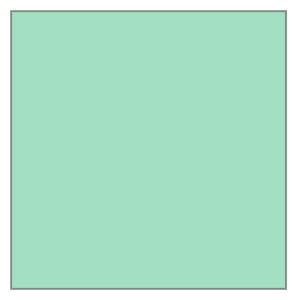

In [18]:
print(eopatch.timestamps[:5])
print(repr(eopatch.bbox))

eopatch.bbox.geometry  # draws the shape of BBox

In [19]:
eopatch.get_features()

[(<FeatureType.DATA: 'data'>, 'CLP_MULTI'),
 (<FeatureType.DATA: 'data'>, 'CLP_S2C'),
 (<FeatureType.DATA: 'data'>, 'CLP'),
 (<FeatureType.DATA: 'data'>, 'BANDS-S2-L1C'),
 (<FeatureType.DATA: 'data'>, 'NDVI'),
 (<FeatureType.MASK: 'mask'>, 'CLM_S2C'),
 (<FeatureType.MASK: 'mask'>, 'IS_VALID'),
 (<FeatureType.MASK: 'mask'>, 'CLM_MULTI'),
 (<FeatureType.MASK: 'mask'>, 'CLM'),
 (<FeatureType.MASK: 'mask'>, 'CLM_INTERSSIM'),
 (<FeatureType.MASK: 'mask'>, 'IS_DATA'),
 (<FeatureType.SCALAR: 'scalar'>, 'CLOUD_COVERAGE'),
 (<FeatureType.LABEL: 'label'>, 'RANDOM_DIGIT'),
 (<FeatureType.LABEL: 'label'>, 'IS_CLOUDLESS'),
 (<FeatureType.VECTOR: 'vector'>, 'CLM_VECTOR'),
 (<FeatureType.DATA_TIMELESS: 'data_timeless'>, 'MAX_NDVI'),
 (<FeatureType.DATA_TIMELESS: 'data_timeless'>, 'DEM'),
 (<FeatureType.MASK_TIMELESS: 'mask_timeless'>, 'RANDOM_UINT8'),
 (<FeatureType.MASK_TIMELESS: 'mask_timeless'>, 'LULC'),
 (<FeatureType.MASK_TIMELESS: 'mask_timeless'>, 'VALID_COUNT'),
 (<FeatureType.SCALAR_TIMELESS

## 3.  Create, Update, Delete and Save EOPatch

In [20]:
import numpy as np
from sentinelhub import CRS, BBox

#### 3.1 Creating a new EOPatch

In [21]:
# Since EOPatch represents geolocated data, it should always have a bounding box
new_eopatch = EOPatch(bbox=BBox((0, 0, 1, 1), CRS.WGS84))

In [22]:
new_eopatch[FeatureType.MASK_TIMELESS, "NEW_MASK"] = np.zeros((68, 10, 13), dtype=np.uint8)

In [23]:
# If temporal features are added to an EOPatch that does not have timestamps (or if the dimensions do not match),
# the user is warned that the EOPatch is temporall ill-defined
new_eopatch.timestamps = eopatch.timestamps
new_eopatch[FeatureType.DATA, "BANDS"] = eopatch[FeatureType.DATA, "BANDS-S2-L1C"]

In [24]:
# The following wouldn't work as there are restrictions to what kind of data can be stored in each feature type
# new_eopatch[FeatureType.MASK, 'NEW_MASK'] = np.zeros((10, 10, 13), dtype=np.uint8)
# new_eopatch[FeatureType.VECTOR, 'NEW_MASK'] = np.zeros((10, 10, 13), dtype=np.uint8)
new_eopatch

EOPatch(
  bbox=BBox(((0.0, 0.0), (1.0, 1.0)), crs=CRS('4326'))
  timestamps=[2015-07-11 10:00:08, ...]<length=68>
  mask_timeless={
    NEW_MASK: numpy.ndarray(shape=(68, 10, 13), dtype=uint8)
  }
  data={
    BANDS: numpy.ndarray(shape=(68, 101, 100, 13), dtype=float32)
  }
)

#### 3.2 Deleting the new EOPatch

In [25]:
del new_eopatch[FeatureType.MASK_TIMELESS, "NEW_MASK"]

In [26]:
new_eopatch

EOPatch(
  bbox=BBox(((0.0, 0.0), (1.0, 1.0)), crs=CRS('4326'))
  timestamps=[2015-07-11 10:00:08, ...]<length=68>
  data={
    BANDS: numpy.ndarray(shape=(68, 101, 100, 13), dtype=float32)
  }
)

#### 3.3 Save or update a EOPatch

In [27]:
from eolearn.core import OverwritePermission

In [29]:
OUTPUT_FOLDER = os.path.join(DATASETS_PATH, "outputs")
OUTPUT_FOLDER

'/home/nicksson/Git/agro-serasa/data/outputs'

In [30]:
os.makedirs(OUTPUT_FOLDER, 
            exist_ok=True)
NEW_EOPATCH_PATH = os.path.join(OUTPUT_FOLDER, 
                                "NewEOPatch")
new_eopatch.save(NEW_EOPATCH_PATH, 
                 overwrite_permission=OverwritePermission.OVERWRITE_FEATURES)

#### 3.4 Loading the EOPatch on disk

In [31]:
loaded_eopatch = EOPatch.load(NEW_EOPATCH_PATH)

In [32]:
# compare eopatch with original
new_eopatch == loaded_eopatch

True

#### 3.5 Copy a EOPatch

In [33]:
new_eopatch.copy()

EOPatch(
  bbox=BBox(((0.0, 0.0), (1.0, 1.0)), crs=CRS('4326'))
  timestamps=[2015-07-11 10:00:08, ...]<length=68>
  data={
    BANDS: numpy.ndarray(shape=(68, 101, 100, 13), dtype=float32)
  }
)

In [34]:
new_eopatch.copy(deep=True)

EOPatch(
  bbox=BBox(((0.0, 0.0), (1.0, 1.0)), crs=CRS('4326'))
  timestamps=[2015-07-11 10:00:08, ...]<length=68>
  data={
    BANDS: numpy.ndarray(shape=(68, 101, 100, 13), dtype=float32)
  }
)

## 4. EOTask
- The next core object is EOTask, which is a single well-defined operation on one or more EOPatch objects.
- [EOTask list](https://eo-learn.readthedocs.io/en/latest/eotasks.html)

#### 4.1 Create a new EOTask
We can create a new EOTask by creating a class that inherits from the abstract EOTask class:

In [35]:
from eolearn.core import EOTask
from typing import Any, Tuple

In [36]:
class FooTask(EOTask):

    def __init__(self, foo_param):
        """ Task-specific parameters
        """
        self.foo_param = foo_param

    def execute(self, eopatch, *, patch_specific_param):

        # Do what foo does on EOPatch and return it

        return eopatch

In [37]:
class AddFeatureTask(EOTask):
    """Adds a feature to the given EOPatch.

    :param feature: Feature to be added
    :type feature: (FeatureType, feature_name) or FeatureType
    """

    def __init__(self, feature: Tuple[FeatureType, str]):
        self.feature = feature

    def execute(self, eopatch: EOPatch, *, data: Any) -> EOPatch:
        """Returns the EOPatch with added features.

        :param eopatch: input EOPatch
        :param data: data to be added to the feature
        :return: input EOPatch with the specified feature
        """
        eopatch[self.feature] = data

        return eopatch

In [38]:
eopatch = EOPatch(bbox=BBox((0, 0, 1, 1), CRS.WGS84), timestamps=[f"2017-0{i}-01" for i in range(1, 6)])

add_feature_task = AddFeatureTask((FeatureType.DATA, "NEW_BANDS"))

data = np.zeros((5, 100, 100, 13))

eopatch = add_feature_task.execute(eopatch, data=data)

eopatch

EOPatch(
  bbox=BBox(((0.0, 0.0), (1.0, 1.0)), crs=CRS('4326'))
  timestamps=[2017-01-01 00:00:00, ...]<length=5>
  data={
    NEW_BANDS: numpy.ndarray(shape=(5, 100, 100, 13), dtype=float64)
  }
)

## 5. EONode and EOWorkflow
**EOTasks** can be joined together into an acyclic processing graph called **EOWorkflow**. Since eo-learn 1.0 these tasks first have to be wrapped into instances of EONode class

In [39]:
from eolearn.core import EONode, EOWorkflow, LoadTask, SaveTask

In [40]:
new_feature = FeatureType.LABEL, "NEW_LABEL"

In [43]:
INPUT_EOPATCH = os.path.join(DATASETS_PATH, "example_data")
INPUT_EOPATCH

'/home/nicksson/Git/agro-serasa/data/example_data'

In [44]:
load_task = LoadTask(path=INPUT_EOPATCH)
add_feature_task = AddFeatureTask(new_feature)
save_task = SaveTask(path=OUTPUT_FOLDER, 
                     overwrite_permission=OverwritePermission.OVERWRITE_FEATURES)

In [45]:
# Each EONode object defines dependecies to other EONode objects:
load_node = EONode(load_task, inputs=[], name="Load EOPatch")
add_feature_node = EONode(add_feature_task, inputs=[load_node], name="Add a new feature")
save_node = EONode(save_task, inputs=[add_feature_node], name="Save EOPatch")

In [46]:
workflow = EOWorkflow([load_node, add_feature_node, save_node])
# or 
# workflow = EOWorkflow.from_endnodes(save_node)

In [47]:
workflow

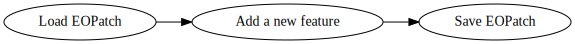

In [48]:
workflow.dependency_graph()
# if error use "!pip install eo-learn[VISUALIZATION]" to install visualization dependences

In [50]:
results = workflow.execute(
    {
        load_node: {"eopatch_folder": "TestEOPatch"},
        add_feature_node: {"data": np.zeros((68, 3), dtype=np.uint8)},
        save_node: {"eopatch_folder": "WorkflowEOPatch"},
    }
)

results

WorkflowResults(outputs={}, start_time=datetime.datetime(2024, 9, 22, 11, 45, 58, 711174), end_time=datetime.datetime(2024, 9, 22, 11, 45, 59, 83891), stats={'LoadTask-49afb55578f111ef8319-0578f5f287bc': NodeStats(node_uid='LoadTask-49afb55578f111ef8319-0578f5f287bc', node_name='Load EOPatch', start_time=datetime.datetime(2024, 9, 22, 11, 45, 58, 711209), end_time=datetime.datetime(2024, 9, 22, 11, 45, 58, 772048), exception_info=None), 'AddFeatureTask-49afb89f78f111efa617-49b318fc4372': NodeStats(node_uid='AddFeatureTask-49afb89f78f111efa617-49b318fc4372', node_name='Add a new feature', start_time=datetime.datetime(2024, 9, 22, 11, 45, 58, 774037), end_time=datetime.datetime(2024, 9, 22, 11, 45, 58, 774085), exception_info=None), 'SaveTask-49afbaed78f111efb909-5559a9c806a6': NodeStats(node_uid='SaveTask-49afbaed78f111efb909-5559a9c806a6', node_name='Save EOPatch', start_time=datetime.datetime(2024, 9, 22, 11, 45, 58, 775287), end_time=datetime.datetime(2024, 9, 22, 11, 45, 59, 82969),

## 6. EOExecutor
**EOExecutor** handles the execution and monitoring of EOWorkflows. It enables executing a workflow multiple times and in parallel. At the end, it generates a report containing the summary of the workflow’s execution process.

In [51]:
from eolearn.core import EOExecutor

In [56]:
execution_args = [  # EOWorkflow will be executed for each of these 5 dictionaries:
    {
        load_node: {"eopatch_folder": "TestEOPatch"},
        add_feature_node: {"data": idx * np.ones((10, 3), dtype=np.uint8)},
        save_node: {"eopatch_folder": f"ResultEOPatch{idx}"},
    }
    for idx in range(5)
]

In [57]:
executor = EOExecutor(workflow, execution_args, save_logs=True, logs_folder=OUTPUT_FOLDER)

In [58]:
results = executor.run(workers=3)  # The execution will use at most 3 parallel processes

  0%|          | 0/5 [00:00<?, ?it/s]

/tmp/ipykernel_25023/1749671361.py:18: TemporalDimensionWarning: Missmatch in temporal dimensions when adding (<FeatureType.LABEL: 'label'>, 'NEW_LABEL'): EOPatch has 68 timestamps while the value has a temporal size of 10.
  eopatch[self.feature] = data
/tmp/ipykernel_25023/1749671361.py:18: TemporalDimensionWarning: Missmatch in temporal dimensions when adding (<FeatureType.LABEL: 'label'>, 'NEW_LABEL'): EOPatch has 68 timestamps while the value has a temporal size of 10.
  eopatch[self.feature] = data
/tmp/ipykernel_25023/1749671361.py:18: TemporalDimensionWarning: Missmatch in temporal dimensions when adding (<FeatureType.LABEL: 'label'>, 'NEW_LABEL'): EOPatch has 68 timestamps while the value has a temporal size of 10.
  eopatch[self.feature] = data
/home/nicksson/Git/agro-serasa/.venv/lib/python3.11/site-packages/eolearn/core/eodata.py:577: TemporalDimensionWarning: Missmatch in temporal dimensions when adding (<FeatureType.LABEL: 'label'>, 'NEW_LABEL'): EOPatch has 68 timestamps

In [59]:
executor.make_report()
print(f"Report was saved to location: {executor.get_report_path()}")

Report was saved to location: /home/nicksson/Git/agro-serasa/data/outputs/eoexecution-report-2024_09_22-11_47_36/report.html
